# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import numpy as np
from sklearn import metrics


## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [63]:
student_data = pd.DataFrame({ 'Age': [17,51,27,21,36,48,19,26,54,30], "Tardies": [10,1,5,9,4,2,9,6,0,3]})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

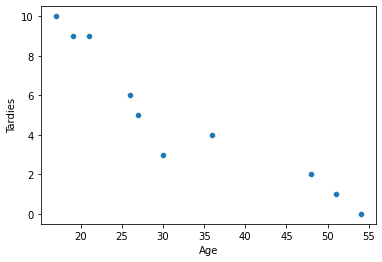

In [39]:
sns.scatterplot (data=student_data, x="Age", y="Tardies")


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Se ve claramente la tendencia a la baja con el aumento de la edad. Sobre una hipótesis, podemos decir que a más edad, menos veces se llega tarde

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [40]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Como ya intuíamos por el scatterplot, la correlación es muy alta, lo que implica que, en efecto, exixte una relación, en este caso negativa, entre edad y número de retrasos.

In [42]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


La que nos interesa es la que cruza y como vemos es una covarianza negativa, que quiere decir que a mayor es uno de los elementos, menor será el otro. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Mi variable a predecir será la edad, con regresion lineal simple, porque no hay mas datos. Primero he probado varias funciones y la verdad que no me acercaba ni de cerca, así que me decanto por hacer "minitrampas" para buscar mi predicción

In [82]:
lr = LinearRegression()

In [84]:
lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [86]:
beta_0

12.888803363135768

In [96]:
beta_1

-0.2428207709159808

In [89]:
student_data["prediction_1"] = -0.24 * student_data.Age + 13

In [99]:
student_data

,Age,Tardies,prediction_1
0,17,10,8.92
1,51,1,0.76
2,27,5,6.52
3,21,9,7.96
4,36,4,4.36
5,48,2,1.48
6,19,9,8.44
7,26,6,6.76
8,54,0,0.04
9,30,3,5.80


Plot your regression model on your scatter plot.

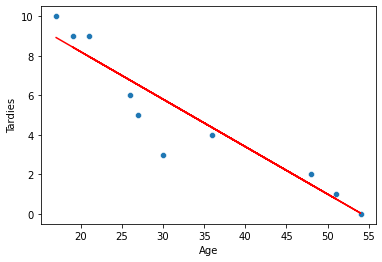

In [94]:
sns.scatterplot (data=student_data, x="Age", y="Tardies")
plt.plot(student_data.Age, student_data.prediction_1, color='r', label='worse')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [264]:
result0=smf.ols ("Tardies ~ prediction_1", data=student_data).fit()
result0.summary() #R2 adj=0.981

C:\Users\asiok\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           5.57e-05
Time:                        21:51:09   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2640      0.783     -0.337      0.745      -2.068       1.541
prediction_1     1.0118      0.131      7.734      0.000       0.710       1.313
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El modelo no es malo, que para eso lo he hecho con predict. En cualquier caso la muestra es demasiado pequeña para sacar cualqueir conclusión, aunque la correlación sea altísima y podamos entrenar un modelo con r2 alto.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [102]:
df1= pd.read_csv ("vehicles.csv")


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Lo primero que voy a hacer es quitar todas las columnas que no vamos a utilizar, y les cambio el nombre luego, que da error al aplicar smf.ols

In [103]:
df=df1[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]


In [104]:
df.columns= ["Year", "Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year", "CO2EG_M"]
df.corr()

,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,Fuel_Cost_Year,CO2EG_M
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel_Barrels_Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined_MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel_Cost_Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2EG_M,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Nos interesea la ultima columna, se aprecia una correlación muy alta en casi todos las variables, destacando fuel barrels year. La variable Year parece mucho menos correlacionada.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Primero voy a sacar algunos summary y usaré el r2 ajustado

In [ ]:
prueba=smf.ols ("CO2EG_M ~ Fuel_Barrels_Year", data=df).fit()
prueba.summary() #0.973

Afina bastante, pero seguro que se puede afinar más si incluimos más variables

In [214]:
result=smf.ols ("CO2EG_M ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=df).fit()
result.summary() #R2 adj=0.981

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2EG_M   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.687e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:07:38   Log-Likelihood:            -1.5173e+05
No. Observations:               35952   AIC:                         3.035e+05
Df Residuals:                   35946   BIC:                         3.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel_Barrels_Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined_MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel_Cost_Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mejor, voy a probar con combinaciones entre ellas:

In [ ]:
result2=smf.ols ("CO2EG_M ~ Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=df).fit()
result2.summary() #0.98

In [ ]:
result3=smf.ols ("CO2EG_M ~ Fuel_Barrels_Year + Fuel_Cost_Year", data=df).fit()
result3.summary() #0.977

Entiendo que la suma de 5 de sus partes siempre va a ser mayor que la suma de menos. En cualquier caso, me quedaría con result2, que tiene dos variables menos.

Ahora voy a probar con las multiplicaciones, es decir, incluiremos las relaciones entre las variables y sus posibles sinergias

In [217]:
result4=smf.ols ("CO2EG_M ~ Cylinders * Fuel_Barrels_Year * Combined_MPG * Fuel_Cost_Year", data=df).fit()
result4.summary()#0.995

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2EG_M   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.136e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:21:10   Log-Likelihood:            -1.2628e+05
No. Observations:               35952   AIC:                         2.526e+05
Df Residuals:                   35936   BIC:                         2.527e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
Intercept                                                 593.7660     15.883     37.384      0.000     562.635     624.897
Cylinders                                                 -94.0279      2.575    -36.519      0.000     -99.075     -88.981
Fuel_Barrels_Year                                          13.4461      0.457     29.421      0.000      12.550      14.342
Cylinders:Fuel_Barrels_Year                                 0.2751      0.070      3.942      0.000       0.138       0.412
Combined_MPG                                               -0.4190      0.161     -2.598      0.009      -0.735      -0.103
Cylinders:Combined_MPG                                     -0.2135      0.040     -5.274      0.000      -0.293      -0.134
Fuel_Barrels_Year:Combined_MPG                             -1.3641      0.041    -33.019      0.000      -1.445      -1.283
Cylinders:Fuel_Barrels_Year:Combined_MPG                    0.3383      0.006     52.234      0.000       0.326       0.351
Fuel_Cost_Year                                             -0.2066      0.011    -18.098      0.000      -0.229      -0.184
Cylinders:Fuel_Cost_Year                                    0.0683      0.001     45.929      0.000       0.065       0.071
Fuel_Barrels_Year:Fuel_Cost_Year                            0.0011   8.98e-05     11.828      0.000       0.001       0.001
Cylinders:Fuel_Barrels_Year:Fuel_Cost_Year              -6.683e-05   1.08e-05     -6.184      0.000    -8.8e-05   -4.56e-05
Combined_MPG:Fuel_Cost_Year                                -0.0025      0.000    -10.421      0.000      -0.003      -0.002
Cylinders:Combined_MPG:Fuel_Cost_Year                      -0.0003   3.94e-05     -7.987      0.000      -0.000      -0.000
Fuel_Barrels_Year:Combined_MPG:Fuel_Cost_Year               0.0009    3.6e-05     23.982      0.000       0.001       0.001
Cylinders:Fuel_Barrels_Year:Combined_MPG:Fuel_Cost_Year    -0.0002   4.89e-06    -43.466      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    41212.431   Durbin-Watson:                   1.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14111434.309
Skew:                           5.539   Prob(JB):                         0.00
Kurtosis:                      99.423   Cond. No.                     1.67e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Esta gana, he probado también con distintas multiplicaciones entre ellas, y sigue siendo mejor la combinación de todas, asi que las usaré todas para predecir, luego será una regresion lineal multiple. Por otra parte he eliminado el Year también, con él me daba 0.996 de r2, pero no sabría construir la función con los valores que tenía en coef e intercept

Para la función predictora creo que sencillamente tendría que multiplicar el coeficiente ( -0.0002 * columna1 * columna2... columna n) y sumarle el intercepto. Pero primero quiero probar a ver que pasa con LinnearRegression. Voy a ir siguiendo la [documentación](https://realpython.com/linear-regression-in-python/) paso a paso, y a ver si sale algo parecido a utilizando summary. 

In [203]:
X = df[["Cylinders", "Fuel_Barrels_Year", "Combined_MPG", "Fuel_Cost_Year" ]]
y = df.CO2EG_M

lr.fit(X, y)

LinearRegression()

In [204]:
beta1=lr.coef_
beta0=lr.intercept_
beta0

131.15632475418926

In [211]:
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
r_sq #esto es el R2, que sale más bajo.


0.9802919387898396

Y hasta aquí con LinearRegression, que su r2 es más bajo. Por otra parte, el predict saca varios multiplicadores y el mismo intercepto que summary sumando. Seguimos con nuestra prediccion con summary

In [30]:
df1["Prediction"]= 593.7660 + df1["Cylinders"] * df1["Fuel Barrels/Year"] * df1["Combined MPG"] * df1["Fuel Cost/Year"] * -0.0002

In [109]:
df3= df1[["Prediction", "CO2 Emission Grams/Mile"]]
df3.columns=["Prediction", "CO2"]
df3 # disculpad el juego con los dfs, pero me daba problemas al hacer el summary y al intentar crear la columna prediction

,Prediction,CO2
0,521.538074,522.764706
1,670.721727,683.615385
2,553.326210,555.437500
3,670.721727,683.615385
4,567.591210,555.437500
...,...,...
35947,232.893315,244.000000
35948,232.893315,243.000000
35949,232.893315,244.000000
35950,232.893315,246.000000


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [33]:
result5=smf.ols ("CO2~ Prediction ", data = df3).fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                 1.012e+05
Date:                Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:13:15   Log-Likelihood:            -1.9879e+05
No. Observations:               35952   AIC:                         3.976e+05
Df Residuals:                   35950   BIC:                         3.976e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    434.7411      0.346   1256.761      0.000     434.063     435.419
Prediction    -0.2354      0.001   -318.052      0.000      -0.237      -0.234
==============================================================================
Omnibus:                     2166.280   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9758.066
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                       5.551   Cond. No.                         503.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Después de revisar todos varias veces he concluido que, por una parte mi modelo no parece muy fiable, y por otra que algo he hecho mal en la fórmula. Para sacar la función le he dado la misma importancia a todas.

Después de terminar el bonus, voy a retomarlo con el sumativo:

In [100]:
result2=smf.ols ("CO2EG_M ~ Fuel_Barrels_Year + Combined_MPG + Fuel_Cost_Year", data=df).fit()
result2.summary() #0.98

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CO2EG_M   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 5.932e+05
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:44:15   Log-Likelihood:            -1.5235e+05
No. Observations:               35952   AIC:                         3.047e+05
Df Residuals:                   35948   BIC:                         3.047e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined_MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel_Cost_Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
df1["Prediction"]= 131.6742	+ (df1["Fuel Barrels/Year"] *19.6955) + (df1["Combined MPG"] *-3.1661) + (df1["Fuel Cost/Year"] * 0.0317)

In [107]:
df4= df1[["Prediction", "CO2 Emission Grams/Mile"]]
df4.columns=["Prediction", "CO2"]
df4

,Prediction,CO2
0,521.538074,522.764706
1,670.721727,683.615385
2,553.326210,555.437500
3,670.721727,683.615385
4,567.591210,555.437500
...,...,...
35947,232.893315,244.000000
35948,232.893315,243.000000
35949,232.893315,244.000000
35950,232.893315,246.000000


In [108]:
result6=smf.ols ("CO2~ Prediction ", data = df4).fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.780e+06
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        08:49:52   Log-Likelihood:            -1.5235e+05
No. Observations:               35952   AIC:                         3.047e+05
Df Residuals:                   35950   BIC:                         3.047e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0022      0.367      0.006      0.995      -0.717       0.722
Prediction     0.9998      0.001   1334.035      0.000       0.998       1.001
==============================================================================
Omnibus:                    72576.103   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277518992.008
Skew:                          16.678   Prob(JB):                         0.00
Kurtosis:                     432.124   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ya tenemos un modelo que podemos decir que es fiable. He utilizado fuel barrels year, combined mpg y fuel cost para encontrar mi función, es cierto que incluyendo todas las variables la función obtendría una milésima más, pero creo, e igual me confundo, que es mejor reducir las variables si la diferencia es tan pequeña. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [76]:
df= pd.DataFrame ({ "x" : [ 1,3,4,6,8,9,11,14], "y" : [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [77]:
lr= LinearRegression ()

In [78]:
X = df[["x"]]
y = df.y

lr.fit(X, y)

LinearRegression()

In [79]:
df["prev"]=lr.predict(X)

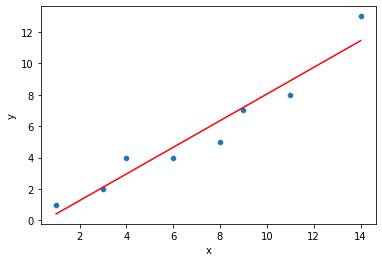

In [80]:
sns.scatterplot (data=df, x="x", y="y")
plt.plot(df.x, df.prev, color='r', label='worse')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

Nos cuenta que a más y, mayor x. Tienen una relación positiva con correlación alta ( a mi parecer)

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

Eliminaré únicamente el ultimo punto, que es el que más alejado parece:

In [82]:
df2=df[:7]

In [91]:
df2=df2.drop (["prev"], axis=1)

In [84]:
X = df2[["x"]]
y = df2.y

lr.fit(X, y)

LinearRegression()

In [96]:
df2["prev"]=lr.predict(X)


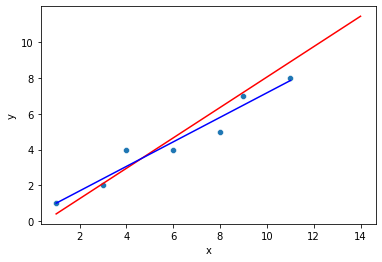

In [95]:
sns.scatterplot (data=df2, x="x", y="y")
plt.plot(df.x, df.prev, color='r', label='worse')
plt.plot(df2.x, df2.prev, color='b', label='worse')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

Se suaviza bastante la pendiente, si eliminamos los puntos que se salen de la norma, obtendremos una función más predictiva para los datos en el rango de la norma, lo cual, según lo que estemos viendo, puede ser muy positivo. Es decir, si para hacer una previsión eliminamos siempre el 2% ( por ejemplo) de los datos por arriba y por abajo, tendremos una función más afinada para el 96% de nuestra muestra, que según el caso, puede ser mejor que una función menos ajustada para el 100%